 Importing all the required libraries

In [43]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Install the statsmodels package if not already installed
!pip install statsmodels

# Import the necessary library for ARIMA
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Importing the data and checking for the Description

In [44]:
# Path to the CSV file in the Downloads folder for Windows
file_path = r'C:\Users\Suhas\Downloads\netmeds.csv'

# Load the data
df = pd.read_csv(file_path, index_col='Months', parse_dates=True)

# Drop any missing values
df = df.dropna()

# Print the shape of the data
print('Shape of data:', df.shape)

# Display the first few rows of the dataframe
print(df.head())

# Display the entire dataframe
df

df.tail()

Shape of data: (37, 3)
        Sales Q    MRP     D
Months                      
May-21  33777.0  209.0  13.0
Jun-21  17717.0  208.0  13.0
Jul-21  45281.0  203.0  14.0
Aug-21  30870.0  204.0  19.0
Sep-21  48644.0  204.0  14.0


,Sales Q,MRP,D
Months,,,
Jan-24,31419.0,207.0,14.0
Feb-24,39225.0,209.0,19.0
Mar-24,26055.0,204.0,19.0
Apr-24,21000.0,203.0,10.0
May-24,40351.0,210.0,19.0


Plotting the data for better understading of the numbers


<AxesSubplot:xlabel='Months'>

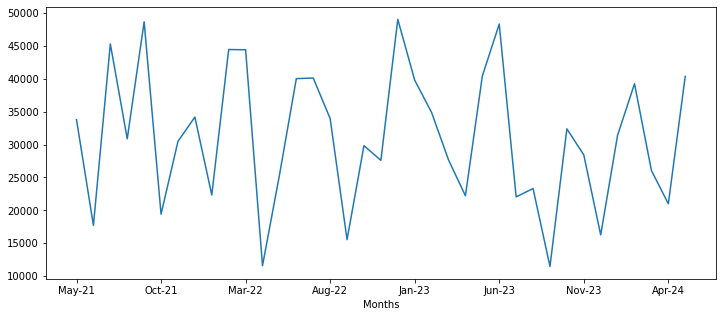

In [29]:
df['Sales Q'].plot(figsize=(12,5))

Checking the data whether it is stationary or no

In [30]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sales Q'])

1. ADF :  -5.399933165452383
2. P-Value :  3.388298890340037e-06
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 35
5. Critical Values :
	 1% :  -3.6327426647230316
	 5% :  -2.9485102040816327
	 10% :  -2.6130173469387756


> Above we have used the Augmented Dickey-Fuller test to check whether the data is stationary or no, since the P-value in the test is very small we can be assured that the data is stationary 
> If the data would not have been stationary differencing might have been required.

Arima Model is a forecasting model and basically divided into 3 parts:
1. P- Auto regression (uses the previous values to make the future prediction ie PACF plot)
2. Q- Moving average (used the past errors/lags to make the future predictions ie ACF plot)
3. D- Differencing ( sicne the data is stationary the value will be 1)


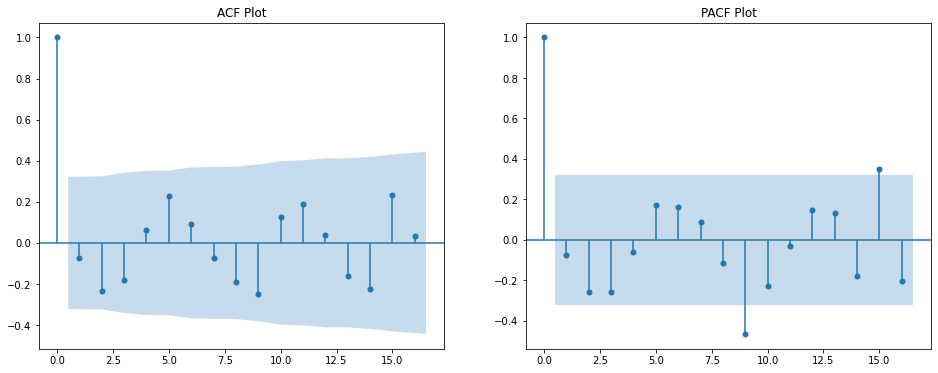

In [31]:
# Step 3: Fit ARIMA Model
# Plot ACF and PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df['Sales Q'].dropna(), ax=axes[0])
axes[0].set_title('ACF Plot')

plot_pacf(df['Sales Q'].dropna(), ax=axes[1])
axes[1].set_title('PACF Plot')

plt.show()

--We have P=9, Q=0 and D=0


In [32]:
# Based on ACF and PACF plots, we select p, d, q
p, d, q = 9, 0, 0
model = ARIMA(df['Sales Q'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Sales Q   No. Observations:                   37
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -388.770
Date:                Tue, 25 Jun 2024   AIC                            799.541
Time:                        11:59:34   BIC                            817.261
Sample:                             0   HQIC                           805.788
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.107e+04   1068.117     29.090      0.000     2.9e+04    3.32e+04
ar.L1         -0.1709      0.187     -0.913      0.361      -0.538       0.196
ar.L2         -0.2405      0.155     -1.554      0.1

In [33]:
# Forecast the next period (June 2024)
forecast = model_fit.forecast(steps=1)
forecasted_sales = forecast.iloc[0]

print(f'Forecasted Sales for June 2024: {forecasted_sales}')

Forecasted Sales for June 2024: 42741.6724974886


In [34]:
# Adjusting the forecast based on MRP and discount
mrp_june_2024 = 210
discount_june_2024 = 18
adjusted_sales = forecasted_sales * (1 - discount_june_2024 / 100)

print(f'Adjusted Sales for June 2024 with MRP 210 and 18% discount: {adjusted_sales}')

Adjusted Sales for June 2024 with MRP 210 and 18% discount: 35048.17144794066


From this we can conclude that in June 2024 (with mrp 210 and discount 18%) The total sales of the units will be 35048

Done

In [35]:
df

,Sales Q,MRP,D
Months,,,
May-21,33777.0,209.0,13.0
Jun-21,17717.0,208.0,13.0
Jul-21,45281.0,203.0,14.0
Aug-21,30870.0,204.0,19.0
Sep-21,48644.0,204.0,14.0
Oct-21,19418.0,210.0,13.0
Nov-21,30476.0,205.0,18.0
Dec-21,34170.0,200.0,16.0
Jan-22,22333.0,210.0,14.0


In [47]:
# Creating the DataFrame
df_new = pd.DataFrame(df)

# New row to be added
new_row = {'Sales Q': 35048.17144794066, 'MRP': 210, 'D': 18}

# Add the new row using loc
df.loc['June-24'] = new_row

# Print the updated DataFrame
print(df_new)

              Sales Q    MRP     D
Months                            
May-21   33777.000000  209.0  13.0
Jun-21   17717.000000  208.0  13.0
Jul-21   45281.000000  203.0  14.0
Aug-21   30870.000000  204.0  19.0
Sep-21   48644.000000  204.0  14.0
Oct-21   19418.000000  210.0  13.0
Nov-21   30476.000000  205.0  18.0
Dec-21   34170.000000  200.0  16.0
Jan-22   22333.000000  210.0  14.0
Feb-22   44430.000000  209.0  20.0
Mar-22   44394.000000  204.0  12.0
Apr-22   11599.000000  208.0  11.0
May-22   25325.000000  204.0  17.0
Jun-22   40008.000000  203.0  15.0
Jul-22   40104.000000  202.0  14.0
Aug-22   33940.000000  206.0  19.0
Sep-22   15551.000000  200.0  20.0
Oct-22   29830.000000  202.0  15.0
Nov-22   27597.000000  201.0  15.0
Dec-22   49014.000000  206.0  16.0
Jan-23   39771.000000  203.0  16.0
Feb-23   34865.000000  209.0  16.0
Mar-23   27667.000000  202.0  15.0
Apr-23   22211.000000  205.0  15.0
May-23   40399.000000  204.0  11.0
Jun-23   48300.000000  200.0  10.0
Jul-23   22046.00000

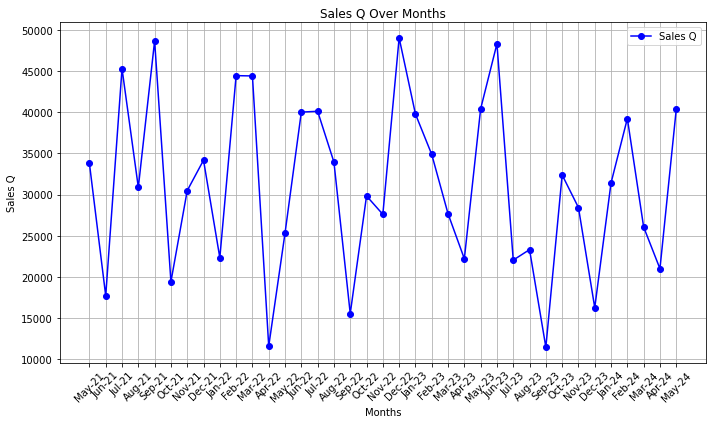

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales Q'], marker='o', linestyle='-', color='b', label='Sales Q')
plt.title('Sales Q Over Months')
plt.xlabel('Months')
plt.ylabel('Sales Q')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
df

,Sales Q,MRP,D
Months,,,
May-21,33777.000000,209.0,13.0
Jun-21,17717.000000,208.0,13.0
Jul-21,45281.000000,203.0,14.0
Aug-21,30870.000000,204.0,19.0
Sep-21,48644.000000,204.0,14.0
Oct-21,19418.000000,210.0,13.0
Nov-21,30476.000000,205.0,18.0
Dec-21,34170.000000,200.0,16.0
Jan-22,22333.000000,210.0,14.0
